# Recommendations

You have to use the data available in the dataset folder. 

Try to answer the questions using python and suitable visualizations.

Be clear and get straight to the point in your answers.

Good job!

<hr>

### Question 1

Try to clean/aggregate the data from crop_data.sql in order to avoid NULL (or NaN) and empty values.

Utilizei o pgAdmin 4 para a crianção da  tabelas edepois disso rodei aqui:

In [131]:
import pandas as pd
def get_table(table, column_names):
    import pandas as pd
    import psycopg2
    conn = psycopg2.connect(database="postgres",
                            host="localhost",
                            user="postgres",
                            password="123456",
                            port="5432")
    cursor = conn.cursor()
    cursor.execute(f'SELECT * FROM {table}')
    return pd.DataFrame(cursor.fetchall(), columns=column_names)

df = get_table('crop.crop_data', ['cod_nivel_territorial',
                                  'nivel_territorial',
                                  'cod_unidade_medida',
                                  'unidade_medida',
                                  'valor',
                                  'cod_municipio',
                                  'cod_ano',
                                  'ano',
                                  'cod_produto_lavouras_temporarias',
                                  'produto_lavouras_temporarias',
                                  'cod_variavel',
                                  'variavel'])

In [132]:
def check_cols(data, columns):
    df_check = pd.DataFrame(zip(data[columns].dtypes.index, 
                                data[columns].dtypes, 
                                data[columns].nunique(), 
                                data[columns].isna().sum(),
                                round(data[columns].isna().sum()/data.shape[0], 3)*100), 
                            columns=['Variável', 'Tipo', 'Qtde_unicos', 'Qtde_NaN', '%_NaN'])
    return df_check.sort_values('Qtde_NaN').reset_index().drop('index', axis=1)

def properties(data, col):
    print('min: ', data[col].min(),
          'max: ', data[col].max(), 
          'mean: ', data[col].mean(),
          'median: ', data[col].median(),
          'mode: ', data[col].mode())

In [133]:
check_cols(df, df.columns)

,Variável,Tipo,Qtde_unicos,Qtde_NaN,%_NaN
0,cod_nivel_territorial,int64,1,0,0.0
1,nivel_territorial,object,1,0,0.0
2,cod_unidade_medida,int64,4,0,0.0
3,unidade_medida,object,4,0,0.0
4,valor,object,3843,0,0.0
5,cod_municipio,int64,141,0,0.0
6,cod_ano,int64,11,0,0.0
7,ano,int64,11,0,0.0
8,cod_produto_lavouras_temporarias,int64,3,0,0.0
9,produto_lavouras_temporarias,object,3,0,0.0


In [134]:
df['valor'] = pd.to_numeric(df['valor'], errors='coerce')  
df['valor'].fillna(0, inplace=True)
media_valor = df['valor'].mean()

print("Média de 'valor':", media_valor)

Média de 'valor': 57050.943683134996


In [135]:
properties(df, "valor")

min:  0.0 max:  4984707.0 mean:  57050.943683134996 median:  3000.0 mode:  0    0.0
Name: valor, dtype: float64


In [136]:
df.head()

,cod_nivel_territorial,nivel_territorial,cod_unidade_medida,unidade_medida,valor,cod_municipio,cod_ano,ano,cod_produto_lavouras_temporarias,produto_lavouras_temporarias,cod_variavel,variavel
0,6,Município,1006,Hectares,0.0,5108402,2016,2016,2713,Soja (em grão),109,Área plantada
1,6,Município,1006,Hectares,0.0,5108402,2016,2016,2713,Soja (em grão),216,Área colhida
2,6,Município,1017,Toneladas,0.0,5108402,2016,2016,2713,Soja (em grão),214,Quantidade produzida
3,6,Município,33,Quilogramas por Hectare,0.0,5108402,2016,2016,2713,Soja (em grão),112,Rendimento médio da produção
4,6,Município,40,Mil Reais,0.0,5108402,2016,2016,2713,Soja (em grão),215,Valor da produção


<hr>

In [137]:
df_json = pd.read_json('../agro_analisys/dataset/ibge_municipios.json')

def remove_accents(a):
    import unidecode
    return unidecode.unidecode(str(a).encode().decode('utf-8')).upper().strip()

df_json['municipio'] = df_json['municipio'].apply(remove_accents)

df_json

,ibge_code,municipio
0,2500502,ALAGOINHA
1,2923704,PARATINGA
2,2109056,PORTO RICO DO MARANHAO
3,3513306,CRUZALIA
4,2206506,MONSENHOR HIPOLITO
...,...,...
10291,2615102,TEREZINHA
10292,2909505,CRAVOLANDIA
10293,5201405,APARECIDA DE GOIANIA
10294,5214804,NOVA AURORA


In [138]:
ibge = pd.merge(df, df_json, left_on='cod_municipio', right_on='ibge_code', how='inner')

ibge.head()

,cod_nivel_territorial,nivel_territorial,cod_unidade_medida,unidade_medida,valor,cod_municipio,cod_ano,ano,cod_produto_lavouras_temporarias,produto_lavouras_temporarias,cod_variavel,variavel,ibge_code,municipio
0,6,Município,1006,Hectares,0.0,5108402,2016,2016,2713,Soja (em grão),109,Área plantada,5108402,VARZEA GRANDE
1,6,Município,1006,Hectares,0.0,5108402,2016,2016,2713,Soja (em grão),109,Área plantada,5108402,VARZEA GRANDE
2,6,Município,1006,Hectares,0.0,5108402,2016,2016,2713,Soja (em grão),216,Área colhida,5108402,VARZEA GRANDE
3,6,Município,1006,Hectares,0.0,5108402,2016,2016,2713,Soja (em grão),216,Área colhida,5108402,VARZEA GRANDE
4,6,Município,1017,Toneladas,0.0,5108402,2016,2016,2713,Soja (em grão),214,Quantidade produzida,5108402,VARZEA GRANDE


In [139]:
ibge = ibge.drop_duplicates()
ibge[['cod_unidade_medida', 'unidade_medida', 'cod_produto_lavouras_temporarias']].value_counts()

cod_unidade_medida  unidade_medida           cod_produto_lavouras_temporarias
1006                Hectares                 114253                              3190
                                             114254                              3190
                                             2713                                1740
33                  Quilogramas por Hectare  114253                              1595
                                             114254                              1595
1017                Toneladas                114253                              1595
                                             114254                              1595
33                  Quilogramas por Hectare  2713                                 870
40                  Mil Reais                2713                                 870
1017                Toneladas                2713                                 870
Name: count, dtype: int64

In [140]:
ibge['variavel'].unique()

array(['Área plantada', 'Área colhida', 'Quantidade produzida',
       'Rendimento médio da produção', 'Valor da produção'], dtype=object)

Entendendo que hectares, quilogramas por hectare, toneladas e Mil Reais sao medidas muito diferentes, para fazer a media foi utilizado apenas as colunas 
toneladas e quilogramas por hectare. Uma noticia que traz um pouco dos valores oficiais por essas medidas: [Safra de grãos é estimada em 313 milhões de toneladas impulsionada pela soja - 11/2022](https://www.gov.br/pt-br/noticias/agricultura-e-pecuaria/2022/11/safra-de-graos-e-estimada-em-313-milhoes-de-toneladas-impulsionada-pela-soja#:~:text=No%20geral%2C%20a%20%C3%A1rea%20semeada,Nacional%20de%20Abastecimento%20(Conab)).

### Question 2

What was the production mean of soybean for each city throughout 2020?

In [141]:
df_2020 = ibge[ibge['ano'] == 2020]
df_2020 = df_2020[df_2020['variavel'] == 'Quantidade produzida']
df_2020 = df_2020[df_2020['cod_produto_lavouras_temporarias'] == 2713]
result_df = df_2020.groupby(['municipio', 'cod_unidade_medida'])['valor'].mean().reset_index()
result_df = result_df.rename(columns={'valor': 'producao_media'})
result_df = result_df.sort_values(by='producao_media', ascending=False)


result_df.sample(15)
# separei por ano e por Quantidade Produzida (na variavel "variavel" que contem as informacoes sobre os valores das outras colunas)
# da unidade medida por municipio com o df filtrado pelo ano solicitado e pelo produto solicitado (nesse caso, soja cd 2713).

,municipio,cod_unidade_medida,producao_media
135,TAPURAH,1017,648000.0
143,VILA BELA DA SANTISSIMA TRINDADE,1017,122760.0
113,RONDOLANDIA,1017,0.0
112,RIO BRANCO,1017,0.0
8,APIACAS,1017,0.0
29,CLAUDIA,1017,361080.0
56,ITIQUIRA,1017,604800.0
65,LAMBARI DOESTE,1017,3647.0
81,NOVA MARINGA,1017,664200.0
138,TORIXOREU,1017,64170.0


In [142]:
# exemplo de filtro por municipio, tendo a média de produção por tipo de unidade medida
result_df[result_df['municipio'] == 'DIAMANTINO']

,municipio,cod_unidade_medida,producao_media
41,DIAMANTINO,1017,1181952.0


In [143]:
# outra maneira de fazer um filtro utilizando a query
result_df.query('producao_media == 0.0')

,municipio,cod_unidade_medida,producao_media
8,APIACAS,1017,0.0
140,VALE DE SAO DOMINGOS,1017,0.0
11,ARAPUTANGA,1017,0.0
141,VARZEA GRANDE,1017,0.0
52,INDIAVAI,1017,0.0
125,SAO JOSE DO POVO,1017,0.0
85,NOVA OLIMPIA,1017,0.0
49,GLORIA DOESTE,1017,0.0
48,GLORIA D'OESTE,1017,0.0
45,FIGUEIROPOLIS DOESTE,1017,0.0


<hr>

### Question 3

Show the top 10 cities with the best production mean for each crop product throughout the years.

In [144]:
# considerando um ranking separado pela quantidade produzida
# fazendo uma cópia do DataFrame original
result_df_2 = df.copy()
result_df_2 = result_df_2[result_df_2['variavel'] == 'Quantidade produzida']

result_df_2 = ibge.groupby(['produto_lavouras_temporarias', 'ano', 'cod_unidade_medida', 'municipio'])['valor'].mean().round(2).reset_index()
result_df_2 = result_df_2.rename(columns={'valor': 'producao_media'})

print(result_df_2)


      produto_lavouras_temporarias   ano  cod_unidade_medida   
0       Milho (em grão) - 1ª safra  2012                  33  \
1       Milho (em grão) - 1ª safra  2012                  33   
2       Milho (em grão) - 1ª safra  2012                  33   
3       Milho (em grão) - 1ª safra  2012                  33   
4       Milho (em grão) - 1ª safra  2012                  33   
...                            ...   ...                 ...   
13045               Soja (em grão)  2021                1017   
13046               Soja (em grão)  2021                1017   
13047               Soja (em grão)  2021                1017   
13048               Soja (em grão)  2021                1017   
13049               Soja (em grão)  2021                1017   

                              municipio  producao_media  
0                              ACORIZAL          2000.0  
1                              AGUA BOA          6000.0  
2                         ALTA FLORESTA          3600.0  

In [145]:
# classificanod o df resultante pelo valor da produção média em ordem decrescente para cada produto, ano e código de medida

dataframes_list = []
rankings = {}
for produto, grupo_produto in result_df_2.groupby('produto_lavouras_temporarias'):
    rankings[produto] = {}
    for ano, grupo_ano in grupo_produto.groupby('ano'):
        rankings[produto][ano] = {}
        for codigo_medida, grupo_codigo in grupo_ano.groupby('cod_unidade_medida'):
            ranking = grupo_codigo.sort_values(by='producao_media', ascending=False).head(10)
            rankings[produto][ano][codigo_medida] = ranking

for produto, ranking_por_ano in rankings.items():
    print(f"Ranking para {produto}:")
    for ano, ranking_por_codigo in ranking_por_ano.items():
        print(f"Ano {ano}:")
        for codigo_medida, ranking in ranking_por_codigo.items():
            print(f"Código de Medida {codigo_medida}:")
            print(ranking)

# Iterar sobre os resultados e salvar em uma lista
for produto, ranking_por_ano in rankings.items():
    for ano, ranking_por_codigo in ranking_por_ano.items():
        for codigo_medida, ranking in ranking_por_codigo.items():
            dataframes_list.append(ranking)

# Concatenar os DataFrames da lista em um DataFrame final
final_df = pd.concat(dataframes_list, ignore_index=True)

Ranking para Milho (em grão) - 1ª safra:
Ano 2012:
Código de Medida 33:
    produto_lavouras_temporarias   ano  cod_unidade_medida   
51    Milho (em grão) - 1ª safra  2012                  33  \
5     Milho (em grão) - 1ª safra  2012                  33   
114   Milho (em grão) - 1ª safra  2012                  33   
108   Milho (em grão) - 1ª safra  2012                  33   
137   Milho (em grão) - 1ª safra  2012                  33   
22    Milho (em grão) - 1ª safra  2012                  33   
124   Milho (em grão) - 1ª safra  2012                  33   
88    Milho (em grão) - 1ª safra  2012                  33   
106   Milho (em grão) - 1ª safra  2012                  33   
130   Milho (em grão) - 1ª safra  2012                  33   

                 municipio  producao_media  
51              GUIRATINGA          9600.0  
5              ALTO GARCAS          9600.0  
114           RONDONOPOLIS          9000.0  
108              QUERENCIA          8820.0  
137                T

In [146]:
final_df.sort_values('ano')

,produto_lavouras_temporarias,ano,cod_unidade_medida,municipio,producao_media
0,Milho (em grão) - 1ª safra,2012,33,GUIRATINGA,9600.0
358,Milho (em grão) - 2ª safra,2012,1017,CAMPO VERDE,473712.0
357,Milho (em grão) - 2ª safra,2012,1017,CAMPOS DE JULIO,491160.0
356,Milho (em grão) - 2ª safra,2012,1017,ITIQUIRA,522900.0
355,Milho (em grão) - 2ª safra,2012,1017,CAMPO NOVO DO PARECIS,565000.0
...,...,...,...,...,...
659,Milho (em grão) - 2ª safra,2022,1017,BRASNORTE,858964.0
304,Milho (em grão) - 1ª safra,2022,33,PEDRA PRETA,8000.0
329,Milho (em grão) - 1ª safra,2022,1017,ITIQUIRA,15600.0
653,Milho (em grão) - 2ª safra,2022,1017,DIAMANTINO,1188355.0


<hr>

### Question 4

Which city has the highest growth in corn crop land throughout the years?

In [147]:
# filtro por produto
milho_df = ibge[ibge['produto_lavouras_temporarias'].isin(['Milho (em grão) - 1ª safra', 'Milho (em grão) - 2ª safra'])]
milho_df = milho_df[milho_df['variavel'] == 'Área plantada']
#agrupamento por ano, unidade medida e municipio e depois calcular a área total de cultivo de milho
milho_agrupado = milho_df.groupby(['ano', 'cod_unidade_medida', 'municipio'])['valor'].sum().reset_index()

In [148]:

dataframes_list = []
# crescimento ano a ano para cada cidade e código de unidade de medida
milho_agrupado['crescimento'] = milho_agrupado.groupby(['cod_unidade_medida', 'municipio'])['valor'].diff()
# como nao temos 2011 na base para comparar, preenchendo com 0 para que nao haja nan no ranking
milho_agrupado['crescimento'].fillna(0, inplace=True)
# ranking para cada ano e código de unidade de medida
rankings = {}
for ano in milho_agrupado['ano'].unique():
    rankings[ano] = {}
    for codigo_medida in milho_agrupado['cod_unidade_medida'].unique():
        subset = milho_agrupado[(milho_agrupado['ano'] == ano) & (milho_agrupado['cod_unidade_medida'] == codigo_medida)]
        ranking = subset.sort_values(by='crescimento', ascending=False)
        rankings[ano][codigo_medida] = ranking

for ano, ranking_por_codigo in rankings.items():
    for codigo_medida, ranking in ranking_por_codigo.items():
        print(f"Ano {ano}, Código de Medida {codigo_medida}:")
        print(ranking) # note que a medida que distribui o ranking é o crescimento, indo do maior para o menor crescimento ano após ano.

# Iterar sobre os resultados e salvar em uma lista
for ano, ranking_por_codigo in rankings.items():
    for codigo_medida, ranking in ranking_por_codigo.items():
        dataframes_list.append(ranking)

# Concatenar os DataFrames da lista em um DataFrame final
final_df_milho = pd.concat(dataframes_list, ignore_index=True)

# Exibir o DataFrame final
print(final_df_milho)



Ano 2012, Código de Medida 1006:
      ano  cod_unidade_medida          municipio    valor  crescimento
0    2012                1006           ACORIZAL    120.0          0.0
73   2012                1006        NORTELANDIA   4500.0          0.0
93   2012                1006          PARANAITA    100.0          0.0
94   2012                1006        PARANATINGA  16010.0          0.0
95   2012                1006        PEDRA PRETA  12000.0          0.0
..    ...                 ...                ...      ...          ...
49   2012                1006      GLORIA DOESTE    300.0          0.0
50   2012                1006  GUARANTA DO NORTE   1300.0          0.0
51   2012                1006         GUIRATINGA  23000.0          0.0
52   2012                1006           INDIAVAI    130.0          0.0
144  2012                1006          VILA RICA  12000.0          0.0

[145 rows x 5 columns]
Ano 2013, Código de Medida 1006:
      ano  cod_unidade_medida          municipio     valor

In [149]:
final_df_milho

,ano,cod_unidade_medida,municipio,valor,crescimento
0,2012,1006,ACORIZAL,120.0,0.0
1,2012,1006,NORTELANDIA,4500.0,0.0
2,2012,1006,PARANAITA,100.0,0.0
3,2012,1006,PARANATINGA,16010.0,0.0
4,2012,1006,PEDRA PRETA,12000.0,0.0
...,...,...,...,...,...
1590,2022,1006,SAPEZAL,164041.0,-7846.0
1591,2022,1006,RIBEIRAO CASCALHEIRA,15000.0,-13000.0
1592,2022,1006,GAUCHA DO NORTE,80000.0,-15000.0
1593,2022,1006,CAMPOS DE JULIO,131000.0,-29601.0


ano
2012       0.000000
2013    4228.062069
2014    -169.558621
2015    1348.131034
2016    2101.648276
2017    5363.889655
2018   -1859.572414
2019    3947.455172
2020    2034.841379
2021    2840.337931
2022    4269.420690
Name: crescimento, dtype: float64


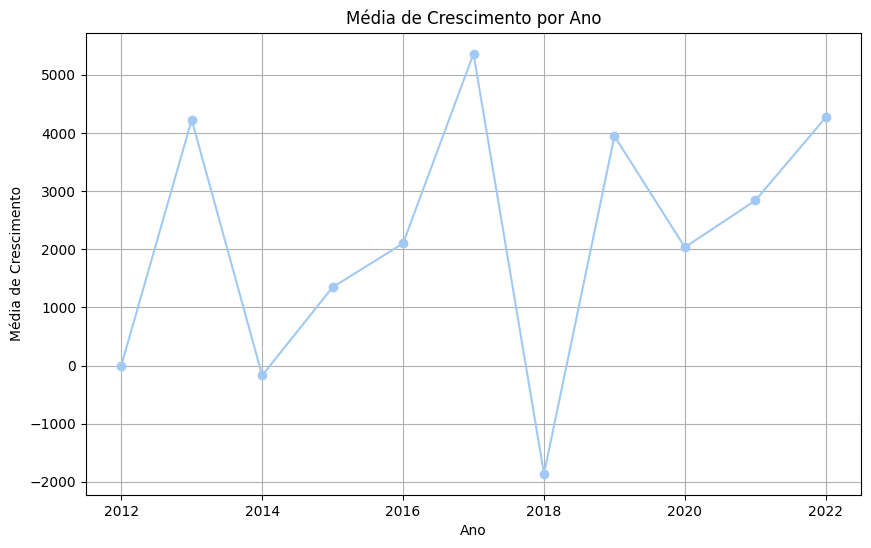

In [150]:
import matplotlib.pyplot as plt
media_por_ano = final_df_milho.groupby('ano')['crescimento'].mean()

# Exibir a média por ano
print(media_por_ano)

# Criar um gráfico de linha para mostrar a média por ano
plt.figure(figsize=(10, 6))
plt.plot(media_por_ano.index, media_por_ano.values, marker='o')
plt.title('Média de Crescimento por Ano')
plt.xlabel('Ano')
plt.ylabel('Média de Crescimento')
plt.grid()
plt.show()

<hr>

### Question 5

What is the growth rate of soybean crop land from 2017 to 2022 for each city?

In [151]:
ibge.head(1)

,cod_nivel_territorial,nivel_territorial,cod_unidade_medida,unidade_medida,valor,cod_municipio,cod_ano,ano,cod_produto_lavouras_temporarias,produto_lavouras_temporarias,cod_variavel,variavel,ibge_code,municipio
0,6,Município,1006,Hectares,0.0,5108402,2016,2016,2713,Soja (em grão),109,Área plantada,5108402,VARZEA GRANDE


In [152]:
import numpy as np
# separando apenas a soja no df
soja_df = ibge[ibge['produto_lavouras_temporarias'] == 'Soja (em grão)']
soja_df = soja_df[soja_df['variavel'] == 'Área plantada']

# Agrupar por cidade e ano e calcular a área total de terras cultivadas com soja
soja_agrupada = soja_df.groupby(['municipio', 'ano', 'cod_unidade_medida'])['valor'].sum().reset_index()

In [153]:
# Calcular a taxa de crescimento anual para cada cidade
taxa_crescimento = {}
cidades = soja_agrupada['municipio'].unique()
codigos_unidade_medida = soja_agrupada['cod_unidade_medida'].unique()

for codigo_unidade_medida in codigos_unidade_medida:
    taxa_crescimento[codigo_unidade_medida] = {}
    
    for cidade in cidades:
        cidade_data = soja_agrupada[(soja_agrupada['municipio'] == cidade) & (soja_agrupada['cod_unidade_medida'] == codigo_unidade_medida)]
        cidade_data = cidade_data.sort_values(by='ano')
        
        # Calcular a taxa de crescimento anual
        cidade_data['taxa_crescimento'] = cidade_data['valor'].pct_change() * 100
        
        # Remover o primeiro ano (2017) para evitar NaN na taxa de crescimento
        cidade_data = cidade_data[cidade_data['ano'] != 2017]
        
        # Calcular a taxa de crescimento média de 2017 a 2022
        taxa_media = cidade_data['taxa_crescimento'].mean()
        
        taxa_crescimento[codigo_unidade_medida][cidade] = taxa_media

# Converter o resultado em um DataFrame
result_df_4 = pd.DataFrame(taxa_crescimento)

result_df_4.replace([np.inf, -np.inf], np.nan, inplace=True)
result_df_4

,1006
ACORIZAL,NaN
AGUA BOA,5.363180
ALTA FLORESTA,18.966041
ALTO ARAGUAIA,7.651118
ALTO BOA VISTA,7.506263
...,...
VALE DE SAO DOMINGOS,NaN
VARZEA GRANDE,NaN
VERA,4.961500
VILA BELA DA SANTISSIMA TRINDADE,21.994979


In [154]:
result_df_4 = pd.DataFrame(taxa_crescimento)

result_df_4.replace([np.inf, -np.inf], np.nan, inplace=True)

# Renomear a coluna sem nome para 'municipio'
result_df_4 = result_df_4.reset_index().rename(columns={'index': 'municipio'})

# Renomear a coluna com o código de categoria (1006) para um nome específico
result_df_4.rename(columns={1006: 'tx_crescimento_17_22'}, inplace=True)

result_df_4

,municipio,tx_crescimento_17_22
0,ACORIZAL,NaN
1,AGUA BOA,5.363180
2,ALTA FLORESTA,18.966041
3,ALTO ARAGUAIA,7.651118
4,ALTO BOA VISTA,7.506263
...,...,...
140,VALE DE SAO DOMINGOS,NaN
141,VARZEA GRANDE,NaN
142,VERA,4.961500
143,VILA BELA DA SANTISSIMA TRINDADE,21.994979


In [155]:
result_df_4 = result_df_4.dropna()

In [156]:
result_df_4[result_df_4['tx_crescimento_17_22'] != 0]

,municipio,tx_crescimento_17_22
1,AGUA BOA,5.363180
2,ALTA FLORESTA,18.966041
3,ALTO ARAGUAIA,7.651118
4,ALTO BOA VISTA,7.506263
5,ALTO GARCAS,-0.530586
...,...,...
138,TORIXOREU,13.161748
139,UNIAO DO SUL,7.282288
142,VERA,4.961500
143,VILA BELA DA SANTISSIMA TRINDADE,21.994979


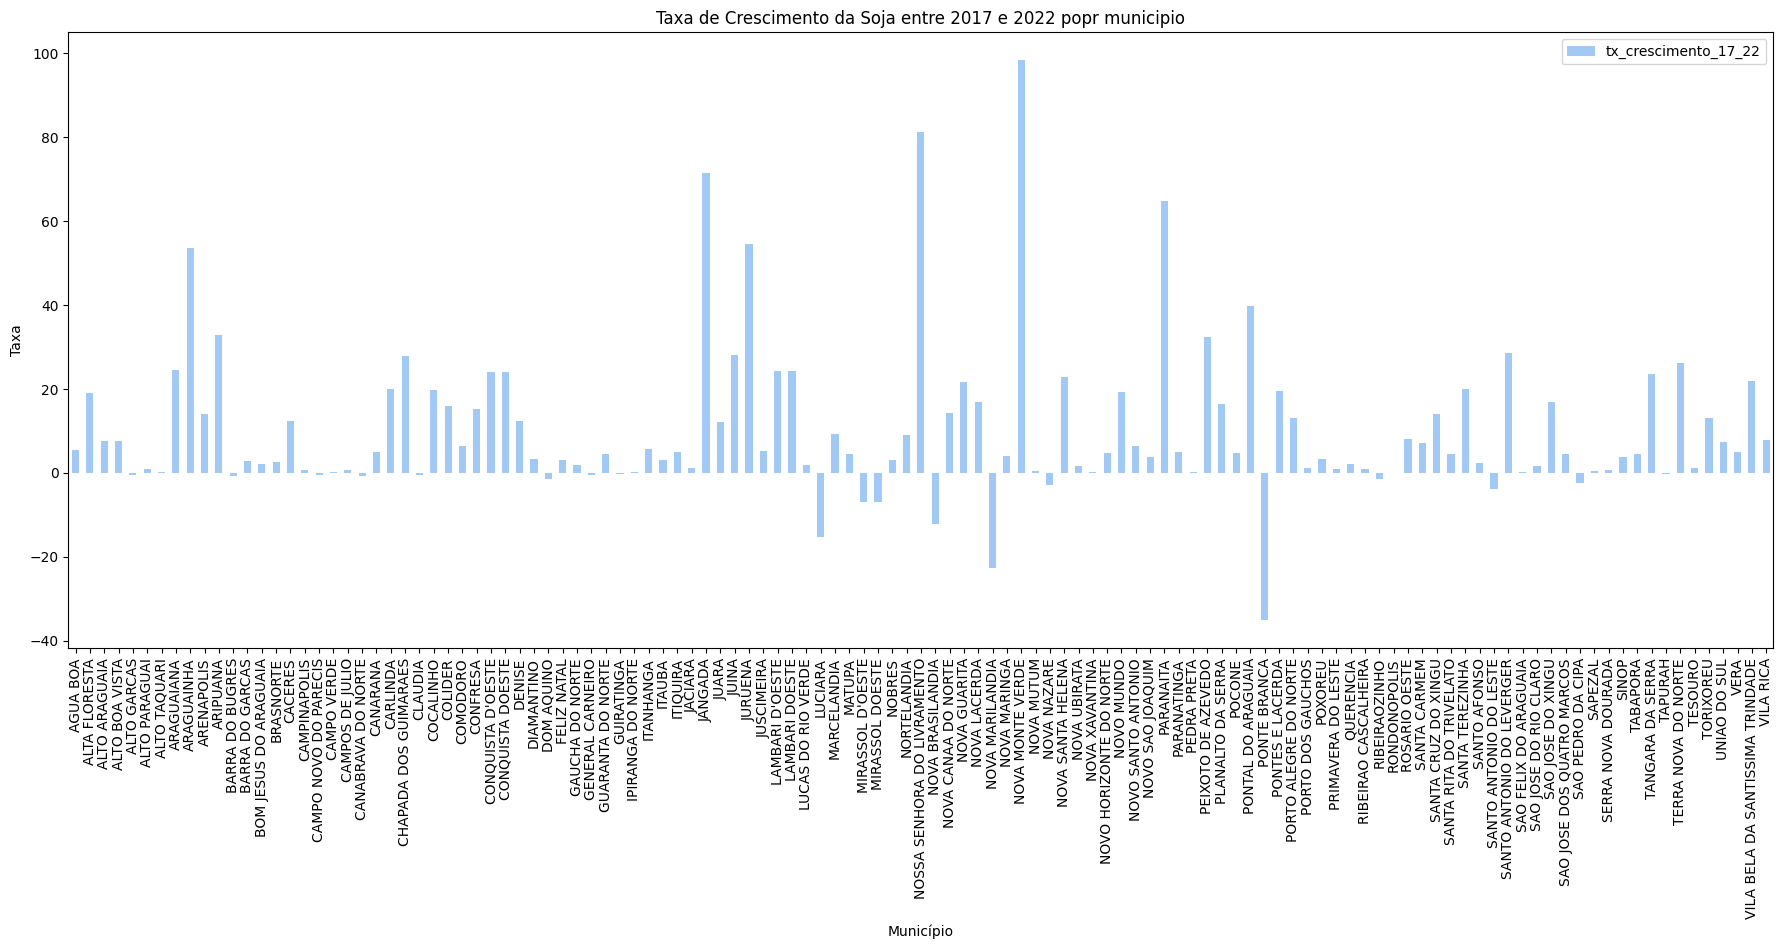

In [157]:
# Plotar um gráfico de barras com os dados
result_df_4.plot(x='municipio', kind='bar', figsize=(22, 8))
plt.title('Taxa de Crescimento da Soja entre 2017 e 2022 popr municipio')
plt.xlabel('Município')
plt.ylabel('Taxa')
plt.show()

##### Lembrando que municipios que não contém informação na coluna valor (0) nao tiveram seus calculos concretizados. Valores infinitos também foram substituidos por NaN

<hr>

### Question 6

Which features from crop_data.sql have some correlation with commodities price?

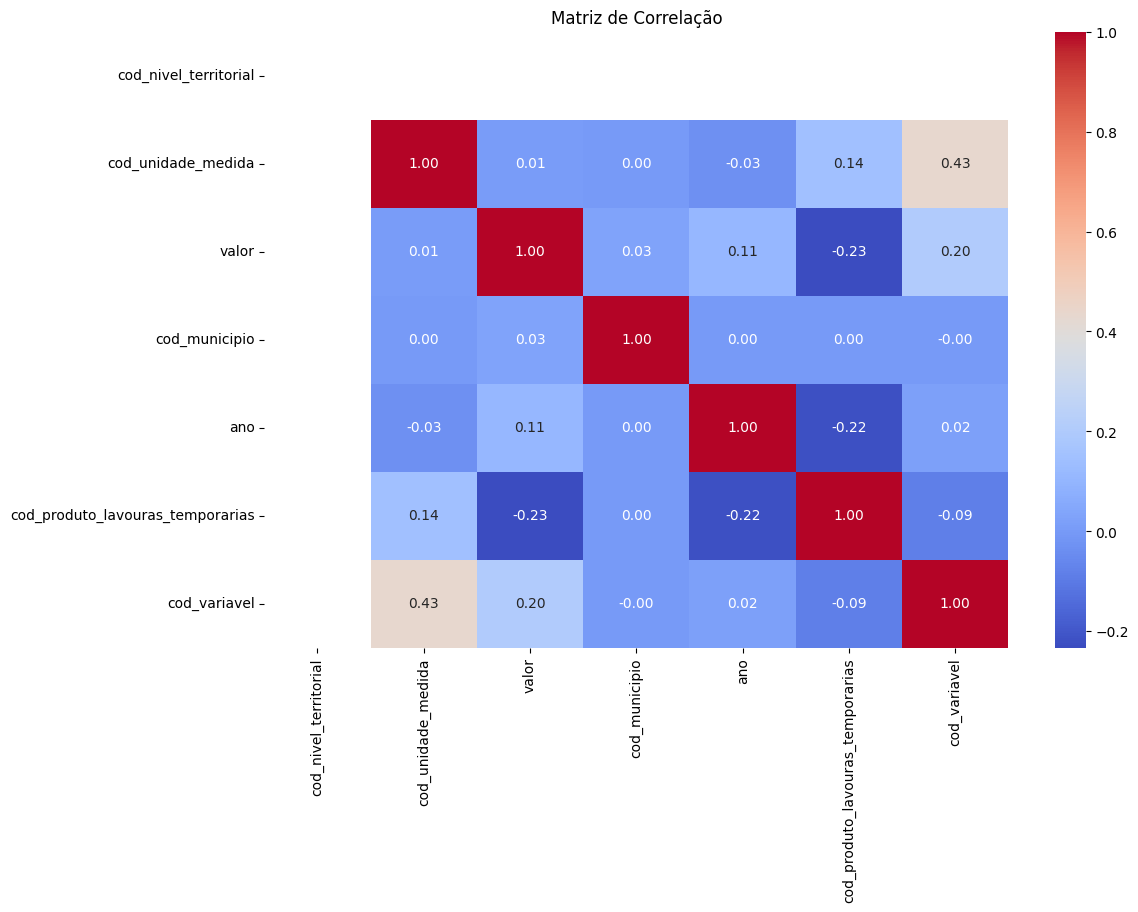

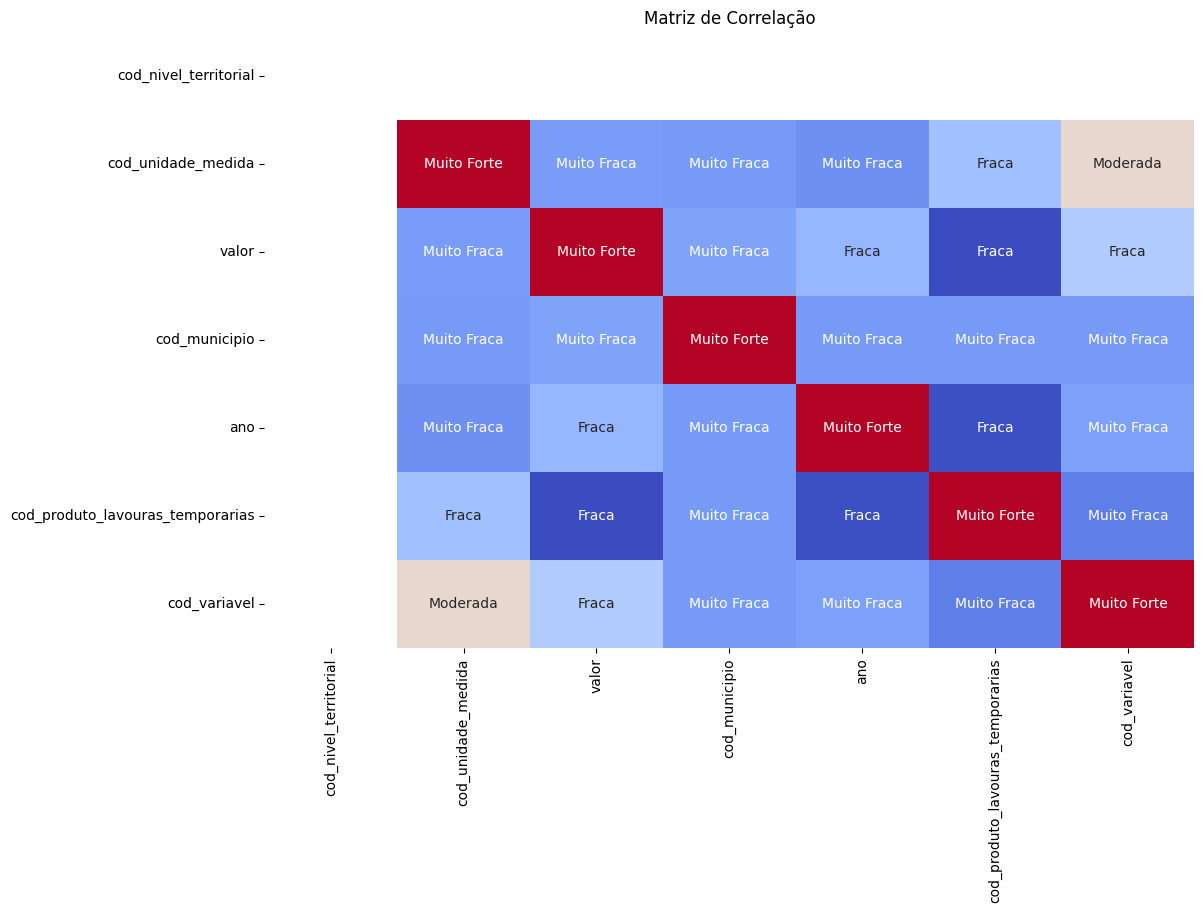

In [158]:
import seaborn as sns
numbers = ibge.select_dtypes(include=['float64', 'int64'])
numbers = numbers.drop(['cod_ano', 'ibge_code'], axis=1)


correlation_matrix = numbers.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

labels = [
    ['Muito Forte', 'Forte', 'Moderada', 'Fraca'],
    ['Forte', 'Moderada', 'Fraca', 'Muito Fraca']
]

# matriz de rótulos com base nos valores da matriz de correlação
labels_matrix = [['' for _ in range(len(correlation_matrix.columns))] for _ in range(len(correlation_matrix.columns))]

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        val = correlation_matrix.iloc[i, j]
        if val >= 0.7:
            labels_matrix[i][j] = labels[0][0]  #muito forte - Positiva
        elif 0.5 <= val < 0.7:
            labels_matrix[i][j] = labels[0][1]  # forte - Positiva
        elif 0.3 <= val < 0.5:
            labels_matrix[i][j] = labels[0][2]  # moderada - Positiva
        elif 0.1 <= val < 0.3:
            labels_matrix[i][j] = labels[0][3]  # fraca - Positiva
        elif -0.1 < val < 0.1:
            labels_matrix[i][j] = labels[1][3]  # fraca - Negativa
        elif -0.3 < val <= -0.1:
            labels_matrix[i][j] = labels[1][2]  # moderada - Negativa
        elif -0.5 < val <= -0.3:
            labels_matrix[i][j] = labels[1][1]  # forte - Negativa
        elif val <= -0.7:
            labels_matrix[i][j] = labels[1][0]  # muito forte - Negativa

# heatmap com rótulos
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=labels_matrix, cmap='coolwarm', fmt='', cbar=False)
plt.title("Matriz de Correlação")
plt.show()

considerando que os preços das commodities estão na coluna VALOR (nao foi enviado dicionário de dados, portanto, inferência), nenhuma das variáveis numéricas 
tem correlação media/forte com essa variável. Todas apresentam uma correlação fraca/muito fraca conforme demonstrado nas matrizes.
atenção para a variavel com o codigo dos produtos (soja, milho 1 safra e milho 2 safra) que apresenta a maior correlaçào com a var valor. Mesmo que fraca, a correelação negativa
é a única acima de 0.20 (0.23). Isso significa que existe certa sensibilidade quanto ao valor/produto.

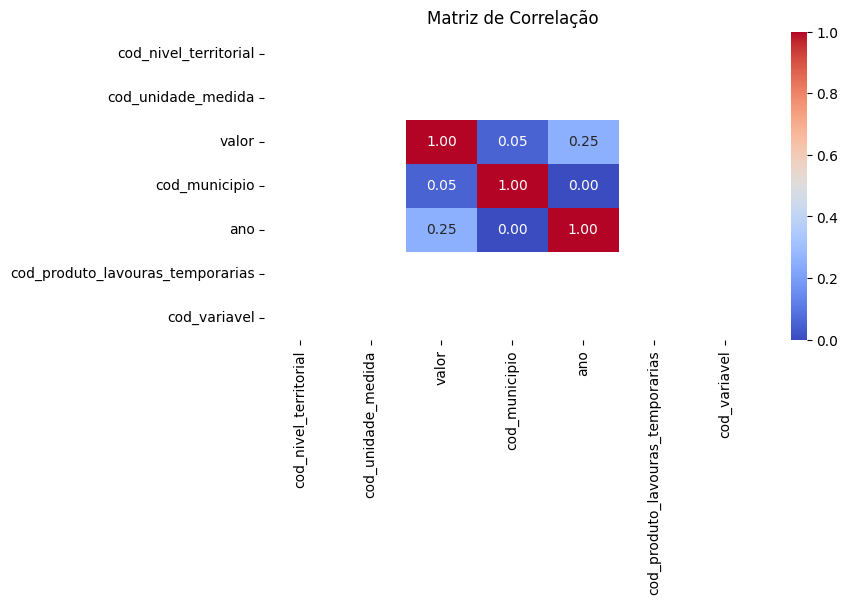

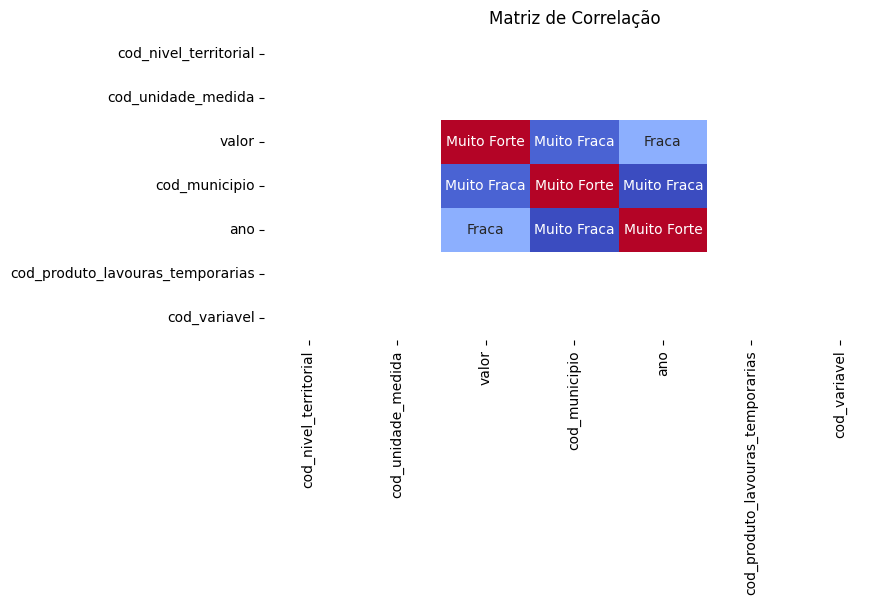

In [159]:
# supondo que o unico valor de commodities na coluna valor seja "Mil Reais", segue matriz:

import seaborn as sns
import matplotlib.pyplot as plt

numbers_40 = ibge.select_dtypes(include=['float64', 'int64'])
numbers_40 = numbers_40.drop(['cod_ano', 'ibge_code'], axis=1)
numbers_40 = numbers_40[numbers_40['cod_unidade_medida'] == 40]

correlation_matrix = numbers_40.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

labels = [
    ['Muito Forte', 'Forte', 'Moderada', 'Fraca'],
    ['Forte', 'Moderada', 'Fraca', 'Muito Fraca']
]

# matriz de rótulos com base nos valores da matriz de correlação
labels_matrix = [['' for _ in range(len(correlation_matrix.columns))] for _ in range(len(correlation_matrix.columns))]

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        val = correlation_matrix.iloc[i, j]
        if val >= 0.7:
            labels_matrix[i][j] = labels[0][0]  #muito forte - Positiva
        elif 0.5 <= val < 0.7:
            labels_matrix[i][j] = labels[0][1]  # forte - Positiva
        elif 0.3 <= val < 0.5:
            labels_matrix[i][j] = labels[0][2]  # moderada - Positiva
        elif 0.1 <= val < 0.3:
            labels_matrix[i][j] = labels[0][3]  # fraca - Positiva
        elif -0.1 < val < 0.1:
            labels_matrix[i][j] = labels[1][3]  # fraca - Negativa
        elif -0.3 < val <= -0.1:
            labels_matrix[i][j] = labels[1][2]  # moderada - Negativa
        elif -0.5 < val <= -0.3:
            labels_matrix[i][j] = labels[1][1]  # forte - Negativa
        elif val <= -0.7:
            labels_matrix[i][j] = labels[1][0]  # muito forte - Negativa

# heatmap com rótulos
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=labels_matrix, cmap='coolwarm', fmt='', cbar=False)
plt.title("Matriz de Correlação")
plt.show()

In [160]:
# para esse filtro, notamos que só existem dados registrados para a soja (2713). Nese caso, temos uma correlação acima das outras com o ano de produção. Isso está explicito na questão 8, onde uma breve anal;ise exploratoria dos dados é feita e um grafico de produção ao longo dos anos é plotado. Vê-se que a soja teve um grande crescimento ao longo dos anos, tendo um crescimento expressivo a partir de 2020.

<hr>

### Question 7

Create time-series plots using python to show the correlations found in the previous question.

C:\Users\marinaferreira\AppData\Local\Temp\ipykernel_23936\2295002210.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=grouped_data, x='ano', y=variable1, palette="tab10", linewidth=2, label=variable1)
C:\Users\marinaferreira\AppData\Local\Temp\ipykernel_23936\2295002210.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=grouped_data, x='ano', y=variable2, palette="tab10", linewidth=2, label=variable2)


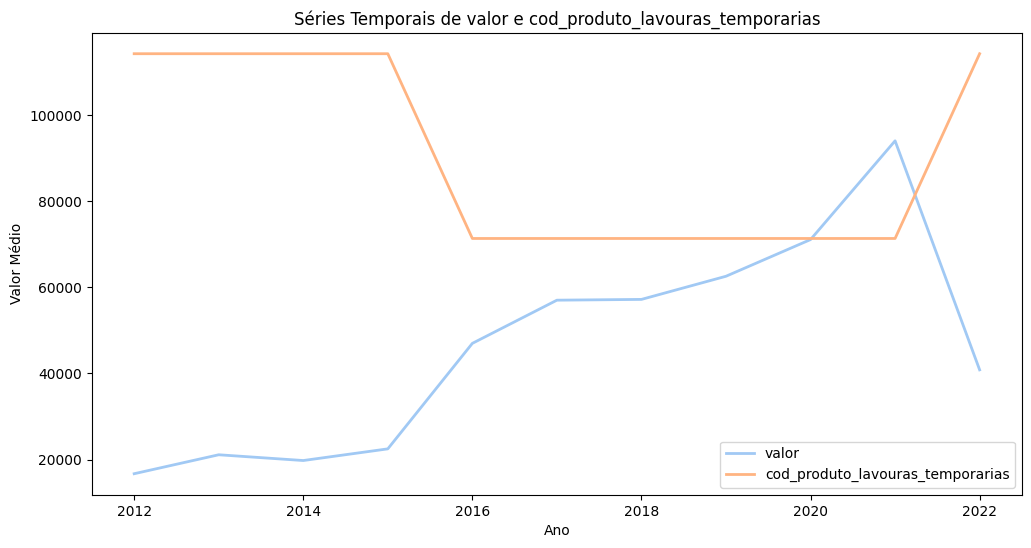

In [161]:
variable1 = 'valor'
variable2 = 'cod_produto_lavouras_temporarias'
grouped_data = numbers.groupby('ano')[[variable1, variable2]].mean()

# Redefina o índice para garantir que 'ano' seja tratado como coluna de dados
grouped_data.reset_index(inplace=True)

# Plote as séries temporais com legendas
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='ano', y=variable1, palette="tab10", linewidth=2, label=variable1)
sns.lineplot(data=grouped_data, x='ano', y=variable2, palette="tab10", linewidth=2, label=variable2)
plt.title(f"Séries Temporais de {variable1} e {variable2}")
plt.xlabel("Ano")
plt.ylabel("Valor Médio")
plt.legend()
plt.show()

In [162]:
# como pôde-se ver pelo grafico, são momentos explícitos que descrevem a correlação negativa de ambas, mesmo que não seja tao forte. Em 2020/21 houve um aumento de
# preços enquanto os produtos se mantiveram, tendo uma subida ali por 2021, acompanhado pela queda do preço, onde ambas seguem caminhos opostos.

<hr>

### Question 8

Make an exploratory analysis under the data and present your insights.

In [163]:
# 114254	Milho (em grão) - 2ª safra	
# 114253	Milho (em grão) - 1ª safra	
# 2713 - soja

In [164]:
ibge.sample(5)

,cod_nivel_territorial,nivel_territorial,cod_unidade_medida,unidade_medida,valor,cod_municipio,cod_ano,ano,cod_produto_lavouras_temporarias,produto_lavouras_temporarias,cod_variavel,variavel,ibge_code,municipio
7748,6,Município,1006,Hectares,180.0,5106505,2018,2018,114254,Milho (em grão) - 2ª safra,109,Área plantada,5106505,POCONE
9977,6,Município,33,Quilogramas por Hectare,9468.0,5104203,2020,2020,114253,Milho (em grão) - 1ª safra,112,Rendimento médio da produção,5104203,GUIRATINGA
15672,6,Município,1017,Toneladas,100.0,5106851,2017,2017,114254,Milho (em grão) - 2ª safra,214,Quantidade produzida,5106851,PORTO ESTRELA
12122,6,Município,33,Quilogramas por Hectare,5697.0,5106224,2014,2014,114254,Milho (em grão) - 2ª safra,112,Rendimento médio da produção,5106224,NOVA MUTUM
5350,6,Município,1017,Toneladas,630.0,5100250,2014,2014,114253,Milho (em grão) - 1ª safra,214,Quantidade produzida,5100250,ALTA FLORESTA


In [165]:
# separando o df para analises:
produtos_unicos = ibge['cod_produto_lavouras_temporarias'].unique()
print("Produtos Agrícolas Únicos:", produtos_unicos)
tipos_plantio = ["Área plantada", "Área colhida"]
producao_isolada = ibge[ibge['variavel'] == "Quantidade produzida"]
area_plantada = ibge[ibge['variavel'].isin(tipos_plantio)]
valor_prod = ibge[ibge['variavel'] == 'Valor da produção']

Produtos Agrícolas Únicos: [  2713 114253 114254]


Produção Média por Produto:
cod_produto_lavouras_temporarias
2713      205309.779310
114253      2555.062069
114254    155040.127273
Name: valor, dtype: float64
Produção Média por Cidade:
municipio
ACORIZAL                                48.214286
AGUA BOA                            164413.928571
ALTA FLORESTA                        33226.500000
ALTO ARAGUAIA                        50145.964286
ALTO BOA VISTA                       32649.535714
                                        ...      
VALE DE SAO DOMINGOS                  2277.535714
VARZEA GRANDE                           69.392857
VERA                                302382.607143
VILA BELA DA SANTISSIMA TRINDADE     37218.535714
VILA RICA                            65706.892857
Name: valor, Length: 145, dtype: float64


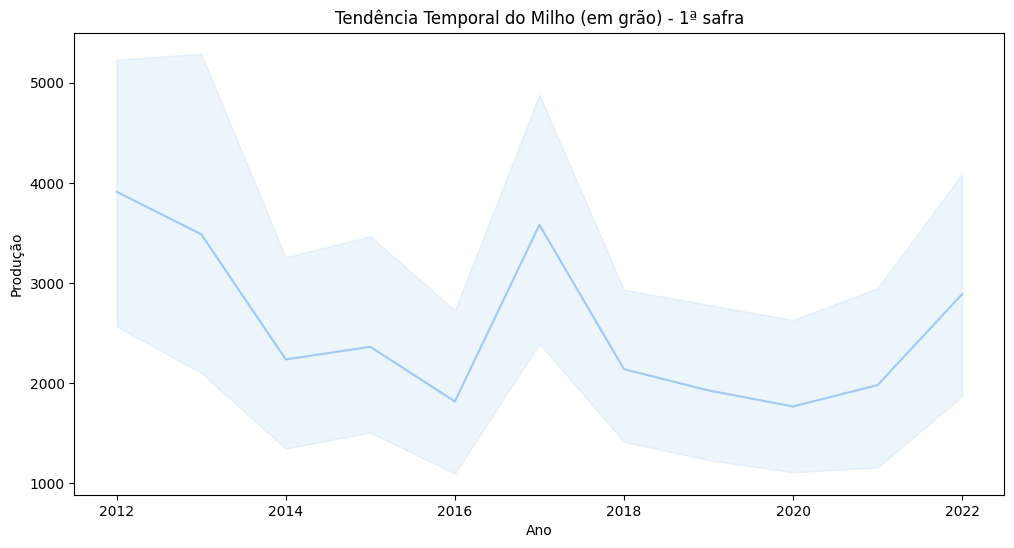

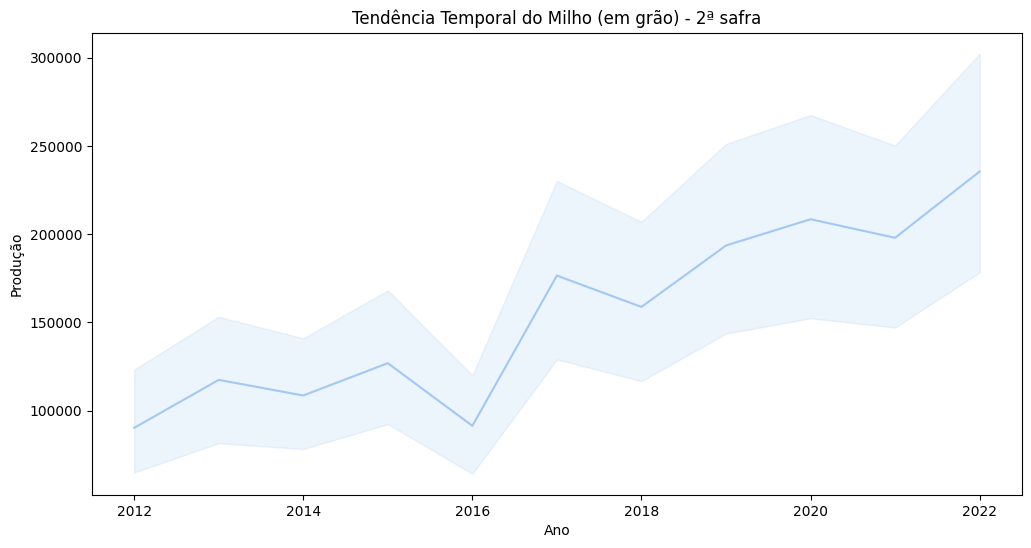

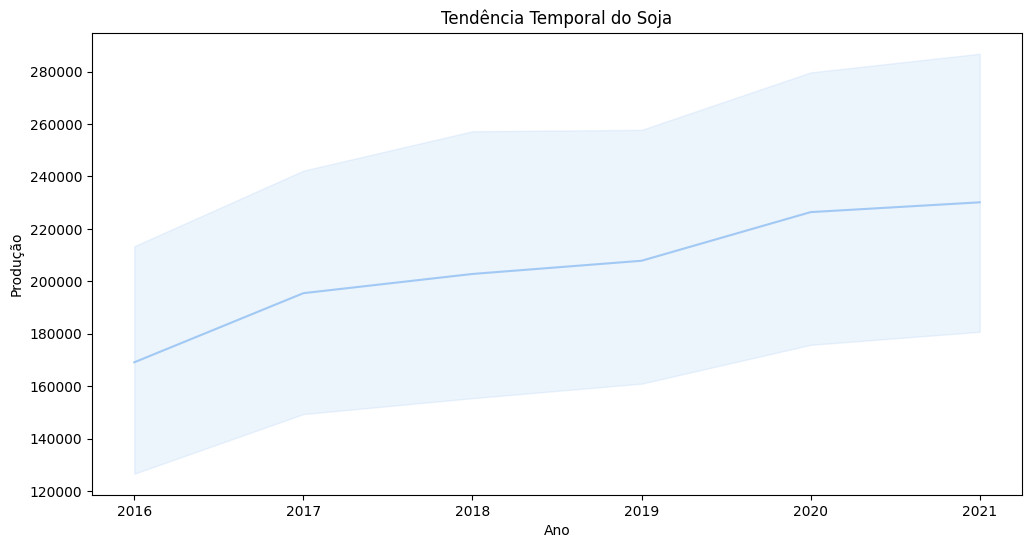

In [166]:

# Análise de Produção por Produto
producao_media_por_produto = producao_isolada.groupby('cod_produto_lavouras_temporarias')['valor'].mean()
print("Produção Média por Produto:")
print(producao_media_por_produto)

# Análise de Produção por Cidade
producao_media_por_cidade = producao_isolada.groupby('municipio')['valor'].mean()
print("Produção Média por Cidade:")
print(producao_media_por_cidade)

# Tendências Temporais para um Produto Específico 
produto_milho = producao_isolada[producao_isolada['cod_produto_lavouras_temporarias'] == 114253]
plt.figure(figsize=(12, 6))
sns.lineplot(data=produto_milho, x='ano', y='valor')
plt.title("Tendência Temporal do Milho (em grão) - 1ª safra")
plt.xlabel("Ano")
plt.ylabel("Produção")
plt.show()

# Tendências Temporais para um Produto Específico 
produto_milho = producao_isolada[producao_isolada['cod_produto_lavouras_temporarias'] == 114254]
plt.figure(figsize=(12, 6))
sns.lineplot(data=produto_milho, x='ano', y='valor')
plt.title("Tendência Temporal do Milho (em grão) - 2ª safra")
plt.xlabel("Ano")
plt.ylabel("Produção")
plt.show()

# Tendências Temporais para um Produto Específico
produto_milho = producao_isolada[producao_isolada['cod_produto_lavouras_temporarias'] == 2713]
plt.figure(figsize=(12, 6))
sns.lineplot(data=produto_milho, x='ano', y='valor')
plt.title("Tendência Temporal do Soja")
plt.xlabel("Ano")
plt.ylabel("Produção")
plt.show()

Nota-se nesses graficos que a produção de soja tem crescido bastante ao longo dos ultimos anos, superando o ritmo de crescimento de 2019 para trás, onde o crescimento é mais suave deum ano para outrop.
No caso do milho da 1 safra, temos um grafico mais irregular. Com um eixo Y bem menor que a produção do milho da safrinha (2 safra), pode-se inferir que com o tempo, o aumento da produção da safrinha aumentou e até mesmo superou a produção da safra, conforme descrito aqui: [9 perguntas e respostas que você deve saber para obter alta produtividade de milho safrinha](https://blog.aegro.com.br/milho-safrinha/#:~:text=O%20milho%20safrinha%20(%202%C2%AA%20safra,vai%20de%20janeiro%20a%20abril.)). A partir de 2021 a produção da safrinha ja superava a produção da safra tendo expressivo aumento ao longo dos anos, conforme podemois ver no grafico plotado aqui.



In [167]:
milho_df_1 = producao_isolada[producao_isolada['produto_lavouras_temporarias'] == 'Milho (em grão) - 1ª safra']
milho_df_2 = producao_isolada[producao_isolada['produto_lavouras_temporarias'] == 'Milho (em grão) - 2ª safra']
soja_df = producao_isolada[producao_isolada['produto_lavouras_temporarias'] == 'Soja (em grão)']

# Agrupar por cidade e calcular a produção total ao longo dos anos para milho
producao_milho_1 = milho_df_1.groupby('municipio')['valor'].sum().reset_index()
producao_milho_2 = milho_df_2.groupby('municipio')['valor'].sum().reset_index()
producao_milho_1.rename(columns={'valor': 'producao_milho'}, inplace=True)
producao_milho_2.rename(columns={'valor': 'producao_milho'}, inplace=True)
# Agrupar por cidade e calcular a produção total ao longo dos anos para soja
producao_soja = soja_df.groupby('municipio')['valor'].sum().reset_index()
producao_soja.rename(columns={'valor': 'producao_soja'}, inplace=True)

# Encontrar a cidade que mais produziu milho
cidade_mais_producao_milho1 = producao_milho_1.loc[producao_milho_1['producao_milho'].idxmax()]
cidade_mais_producao_milho2 = producao_milho_2.loc[producao_milho_2['producao_milho'].idxmax()]
# Encontrar a cidade que mais produziu soja
cidade_mais_producao_soja = producao_soja.loc[producao_soja['producao_soja'].idxmax()]

print("Cidade que mais produziu Milho 1 safra nos ultimos 10 anos (2012-2022):")
print(cidade_mais_producao_milho1)
print("Cidade que mais produziu Milho 2 safra nos ultimos 10 anos (2012-2022):")
print(cidade_mais_producao_milho2)

print("\nCidade que mais produziu Soja no período de 2016-2021:")
print(cidade_mais_producao_soja)


Cidade que mais produziu Milho 1 safra nos ultimos 10 anos (2012-2022):
municipio          SAPEZAL
producao_milho    262055.0
Name: 130, dtype: object
Cidade que mais produziu Milho 2 safra nos ultimos 10 anos (2012-2022):
municipio         NOVA MUTUM
producao_milho    14967379.0
Name: 83, dtype: object

Cidade que mais produziu Soja no período de 2016-2021:
municipio        NOVA UBIRATA
producao_soja       7983832.0
Name: 87, dtype: object


In [168]:
unidade_milho1 = milho_df_1.groupby('unidade_medida',)['valor'].sum().reset_index()
unidade_milho1.rename(columns={'valor': 'producao_total'}, inplace=True)
unidade_milho1

,unidade_medida,producao_total
0,Toneladas,4075324.0


<strong>Toneladas</strong>: A produção total em toneladas é de 4075324 toneladas. Essa unidade de medida representa a quantidade total de produção em toneladas.

In [170]:
milhodf_1 = ibge[ibge['produto_lavouras_temporarias'] == 'Milho (em grão) - 1ª safra']

In [182]:
unidade_milho_ano1 = milhodf_1.groupby(['unidade_medida', 'variavel', 'ano'])['valor'].sum().reset_index()
unidade_milho_ano1.rename(columns={'valor': 'producao_total'}, inplace=True)
unidade_milho_ano1

,unidade_medida,variavel,ano,producao_total
0,Hectares,Área colhida,2012,94357.0
1,Hectares,Área colhida,2013,87970.0
2,Hectares,Área colhida,2014,52793.0
3,Hectares,Área colhida,2015,56092.0
4,Hectares,Área colhida,2016,46287.0
5,Hectares,Área colhida,2017,79834.0
6,Hectares,Área colhida,2018,51128.0
7,Hectares,Área colhida,2019,48192.0
8,Hectares,Área colhida,2020,44468.0
9,Hectares,Área colhida,2021,49681.0


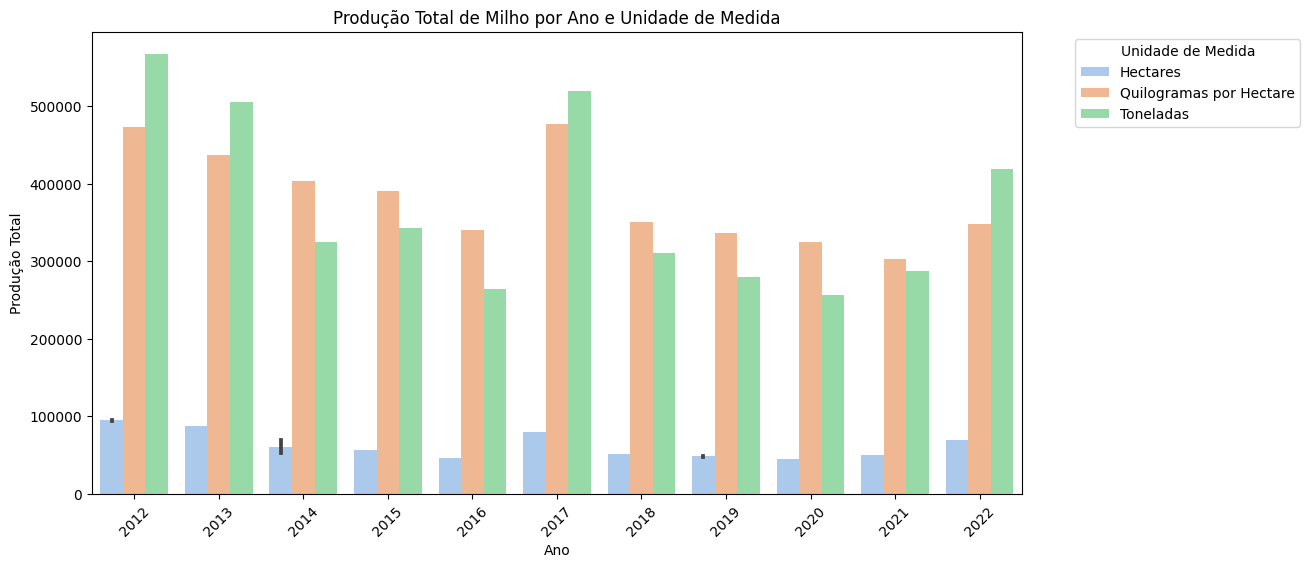

In [185]:
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")
sns.barplot(data=unidade_milho_ano1, x='ano', y='producao_total', hue='unidade_medida')
plt.title('Produção Total de Milho por Ano e Unidade de Medida')
plt.xlabel('Ano')
plt.ylabel('Produção Total')
plt.legend(title='Unidade de Medida', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

É nítido que o milho da primeira safra tem um grafico mais irregular, corroborando com gráficos externos apresentados em que o milho da primeira safra perdeu espaço e investimento para o milho safrinha, que atingiu resultados melhores ao longo dos anos, tomando conta dos graficos de analise de colheita. Tivemos um aumento de hectares no ano de 2022 mas desde 2012 podemos apontar uma queda quase padrao desses numeros. Já quilogramas por hectare e toneladas de milho produzidas também tiveram um padrao mais voltado para a queda, tendo um aumento ali em 2022.

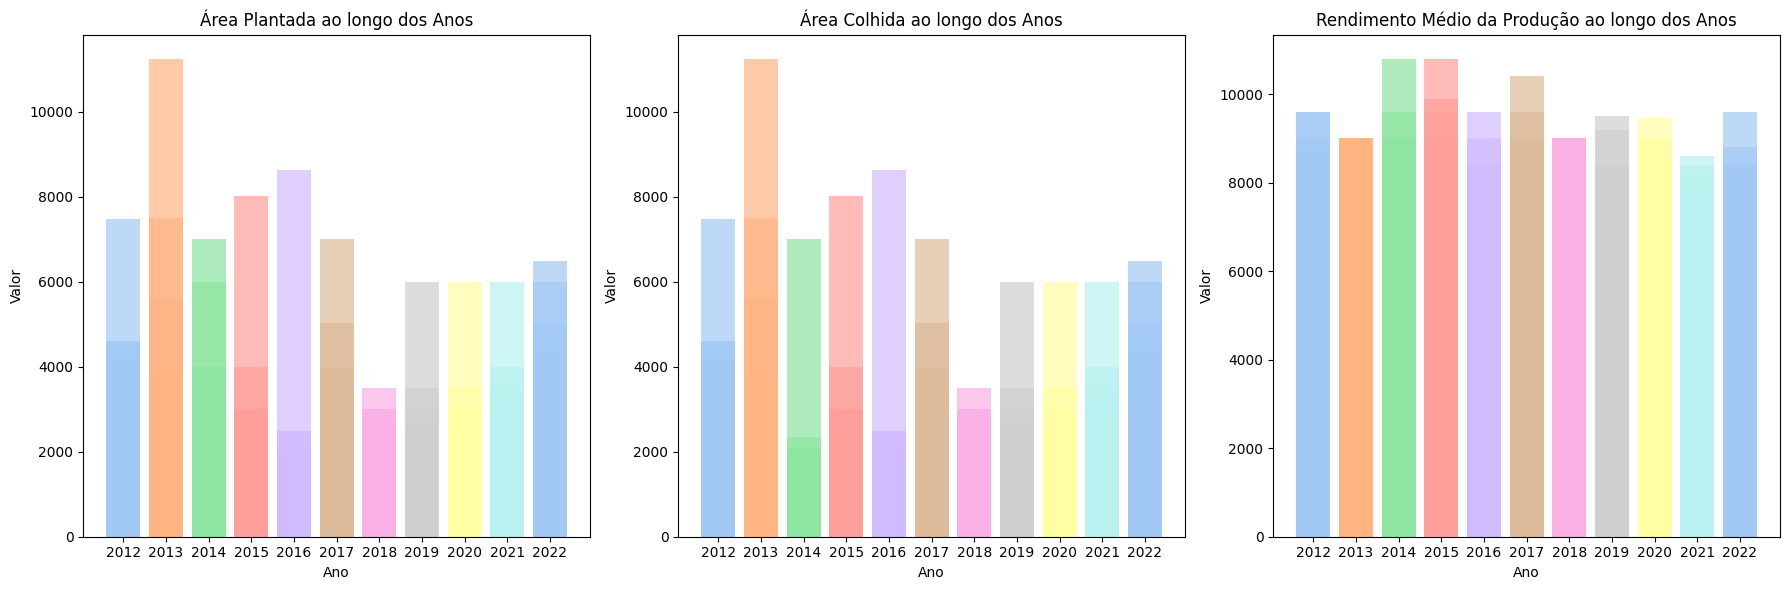

In [215]:
# Filtrar o DataFrame para obter apenas as variáveis desejadas
df_area1 = milhodf_1[milhodf_1['variavel'].isin(['Área plantada', 'Área colhida'])]
df_rendimento = milhodf_1[milhodf_1['variavel'] == 'Rendimento médio da produção']

# Criar subplots separados para cada variável
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de barras para Área Plantada ao longo dos anos
for ano, grupo in df_area1[df_area1['variavel'] == 'Área plantada'].groupby('ano'):
    axs[0].bar(str(ano), grupo['valor'], alpha=0.7)

axs[0].set_title('Área Plantada ao longo dos Anos')
axs[0].set_ylabel('Valor')
axs[0].set_xlabel('Ano')

# Gráfico de barras para Área Colhida ao longo dos anos
for ano, grupo in df_area1[df_area1['variavel'] == 'Área colhida'].groupby('ano'):
    axs[1].bar(str(ano), grupo['valor'], alpha=0.7)

axs[1].set_title('Área Colhida ao longo dos Anos')
axs[1].set_ylabel('Valor')
axs[1].set_xlabel('Ano')

# Gráfico de barras para Rendimento Médio da Produção ao longo dos anos
for ano, grupo in df_rendimento.groupby('ano'):
    axs[2].bar(str(ano), grupo['valor'], alpha=0.7)

axs[2].set_title('Rendimento Médio da Produção ao longo dos Anos')
axs[2].set_ylabel('Valor')
axs[2].set_xlabel('Ano')

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

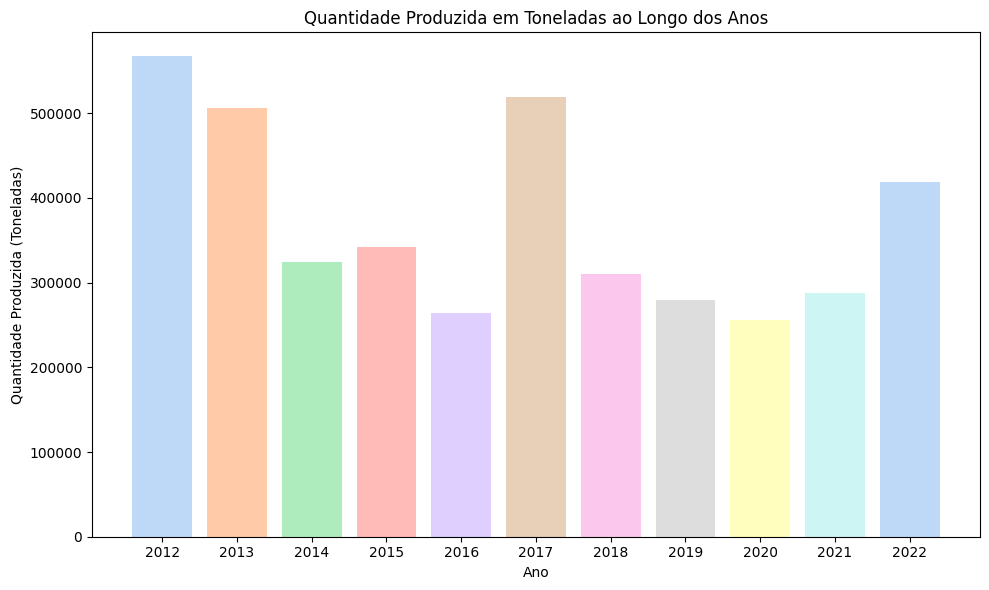

In [216]:
# Filtrar o DataFrame para obter apenas a variável desejada
df_quantidade_produzida1 = milhodf_1[(milhodf_1['variavel'] == 'Quantidade produzida') & (milhodf_1['unidade_medida'] == 'Toneladas')]

# Criar um gráfico de barras para a quantidade produzida em toneladas ao longo dos anos
plt.figure(figsize=(10, 6))
for ano, grupo in df_quantidade_produzida1.groupby('ano'):
    plt.bar(str(ano), grupo['valor'].sum(), alpha=0.7)

plt.title('Quantidade Produzida em Toneladas ao Longo dos Anos')
plt.ylabel('Quantidade Produzida (Toneladas)')
plt.xlabel('Ano')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [125]:
unidade_milho2 = milho_df_2.groupby('unidade_medida')['valor'].sum().reset_index()
unidade_milho2.rename(columns={'valor': 'producao_total'}, inplace=True)
unidade_milho2

,unidade_medida,producao_total
0,Toneladas,247289003.0


Já para os dados da safrinha, temos:
<strong>Toneladas</strong>: A produção total em toneladas é de 247289003 toneladas. Um número expressivo de produção em relação ao Milho da primeira safra.

In [186]:
milhodf_2 = ibge[ibge['produto_lavouras_temporarias'] == 'Milho (em grão) - 2ª safra']

In [187]:
unidade_milho_ano2 = milhodf_2.groupby(['unidade_medida', 'variavel', 'ano'])['valor'].sum().reset_index()
unidade_milho_ano2.rename(columns={'valor': 'producao_total'}, inplace=True)
unidade_milho_ano2

,unidade_medida,variavel,ano,producao_total
0,Hectares,Área colhida,2012,2297340.0
1,Hectares,Área colhida,2013,2917356.0
2,Hectares,Área colhida,2014,2907795.0
3,Hectares,Área colhida,2015,3120127.0
4,Hectares,Área colhida,2016,3270224.0
5,Hectares,Área colhida,2017,4178848.0
6,Hectares,Área colhida,2018,3936656.0
7,Hectares,Área colhida,2019,4513103.0
8,Hectares,Área colhida,2020,4812049.0
9,Hectares,Área colhida,2021,5218685.0


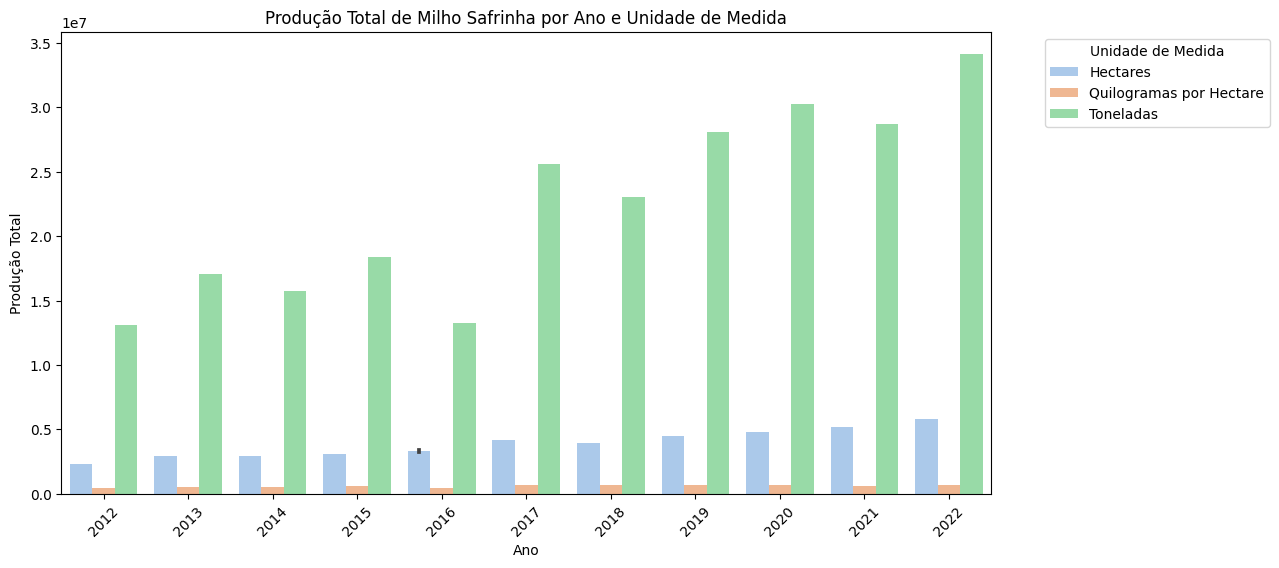

In [188]:
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")
sns.barplot(data=unidade_milho_ano2, x='ano', y='producao_total', hue='unidade_medida')
plt.title('Produção Total de Milho Safrinha por Ano e Unidade de Medida')
plt.xlabel('Ano')
plt.ylabel('Produção Total')
plt.legend(title='Unidade de Medida', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Existe um crescimento expressivo em relação as toneladas de produção ao longo dos anos, o que pode ser um indicativo de maior aproveitamento do espaço cedido para o plantio da primeira safra de milho, trazendo otimização para esse processo

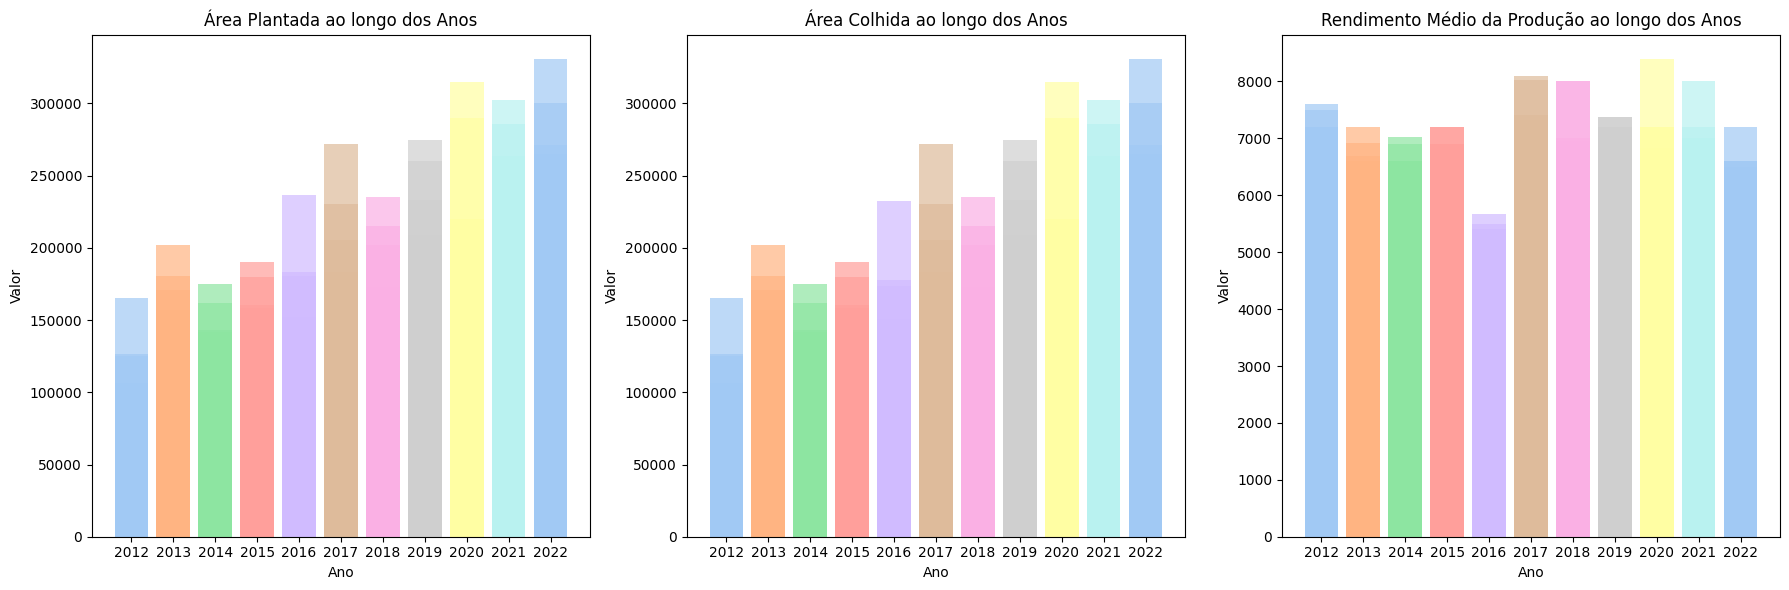

In [217]:
# Filtrar o DataFrame para obter apenas as variáveis desejadas
df_area2 = milhodf_2[milhodf_2['variavel'].isin(['Área plantada', 'Área colhida'])]
df_rendimento = milhodf_2[milhodf_2['variavel'] == 'Rendimento médio da produção']

sns.set_palette(sns.color_palette("pastel"))
# Criar subplots separados para cada variável
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de barras para Área Plantada ao longo dos anos
for ano, grupo in df_area2[df_area2['variavel'] == 'Área plantada'].groupby('ano'):
    axs[0].bar(str(ano), grupo['valor'], alpha=0.7)

axs[0].set_title('Área Plantada ao longo dos Anos')
axs[0].set_ylabel('Valor')
axs[0].set_xlabel('Ano')

# Gráfico de barras para Área Colhida ao longo dos anos
for ano, grupo in df_area2[df_area2['variavel'] == 'Área colhida'].groupby('ano'):
    axs[1].bar(str(ano), grupo['valor'], alpha=0.7)

axs[1].set_title('Área Colhida ao longo dos Anos')
axs[1].set_ylabel('Valor')
axs[1].set_xlabel('Ano')

# Gráfico de barras para Rendimento Médio da Produção ao longo dos anos
for ano, grupo in df_rendimento.groupby('ano'):
    axs[2].bar(str(ano), grupo['valor'], alpha=0.7)

axs[2].set_title('Rendimento Médio da Produção ao longo dos Anos')
axs[2].set_ylabel('Valor')
axs[2].set_xlabel('Ano')

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

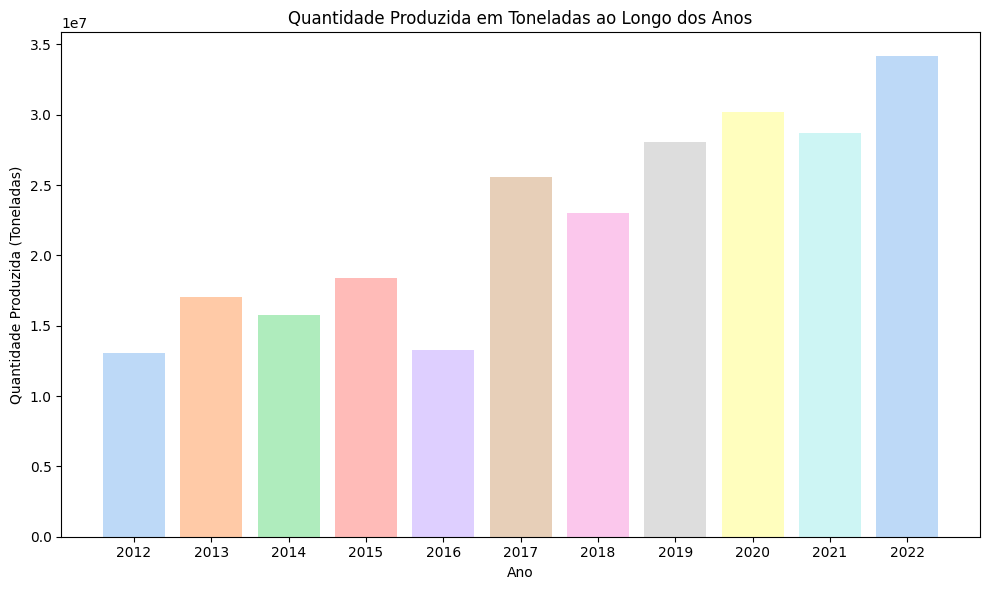

In [218]:
# Filtrar o DataFrame para obter apenas a variável desejada
df_quantidade_produzida2 = milhodf_2[(milhodf_2['variavel'] == 'Quantidade produzida') & (milhodf_2['unidade_medida'] == 'Toneladas')]
sns.set_palette(sns.color_palette("pastel"))
# Criar um gráfico de barras para a quantidade produzida em toneladas ao longo dos anos
plt.figure(figsize=(10, 6))
for ano, grupo in df_quantidade_produzida2.groupby('ano'):
    plt.bar(str(ano), grupo['valor'].sum(), alpha=0.7)

plt.title('Quantidade Produzida em Toneladas ao Longo dos Anos')
plt.ylabel('Quantidade Produzida (Toneladas)')
plt.xlabel('Ano')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [221]:
sojadf = ibge[ibge['produto_lavouras_temporarias'] == 'Soja (em grão)']
#Soja (em grão)

In [224]:
unidade_soja = sojadf.groupby('unidade_medida')['valor'].sum().reset_index()
unidade_soja.rename(columns={'valor': 'producao_total'}, inplace=True)
unidade_soja

,unidade_medida,producao_total
0,Hectares,108859682.0
1,Mil Reais,233841918.0
2,Quilogramas por Hectare,2424702.0
3,Toneladas,178619508.0


Para a soja, temos menos anos de dados registrados na base. 

<strong>Hectares</strong>: A produção total em hectares é de 108859682 hectares. </br>
<strong>Quilogramas por Hectare</strong>: A produção total em quilogramas por hectare é de 2424702 quilogramas por hectare. </br>
<strong>Toneladas</strong>: A produção total em toneladas é de 178619508 toneladas. Um número expressivo de produção em relação ao Milho da primeira safra. </br>
<strong>Mil Reais</strong>: Suponho que a unidade de medida seja em mil reais, portanto, concluo que o valor registrado seja de R$ 233.841.918.000,00 (mais de 233 bilhoes em 5 anos - 2016/2021)

In [222]:
unidade_soja_ano = sojadf.groupby(['variavel', 'unidade_medida', 'ano'])['valor'].sum().reset_index()
unidade_soja_ano.rename(columns={'valor': 'producao_total'}, inplace=True)
unidade_soja_ano

,variavel,unidade_medida,ano,producao_total
0,Quantidade produzida,Toneladas,2016,24526041.0
1,Quantidade produzida,Toneladas,2017,28347694.0
2,Quantidade produzida,Toneladas,2018,29409384.0
3,Quantidade produzida,Toneladas,2019,30139016.0
4,Quantidade produzida,Toneladas,2020,32827826.0
5,Quantidade produzida,Toneladas,2021,33369547.0
6,Rendimento médio da produção,Quilogramas por Hectare,2016,345162.0
7,Rendimento médio da produção,Quilogramas por Hectare,2017,393835.0
8,Rendimento médio da produção,Quilogramas por Hectare,2018,409213.0
9,Rendimento médio da produção,Quilogramas por Hectare,2019,411348.0


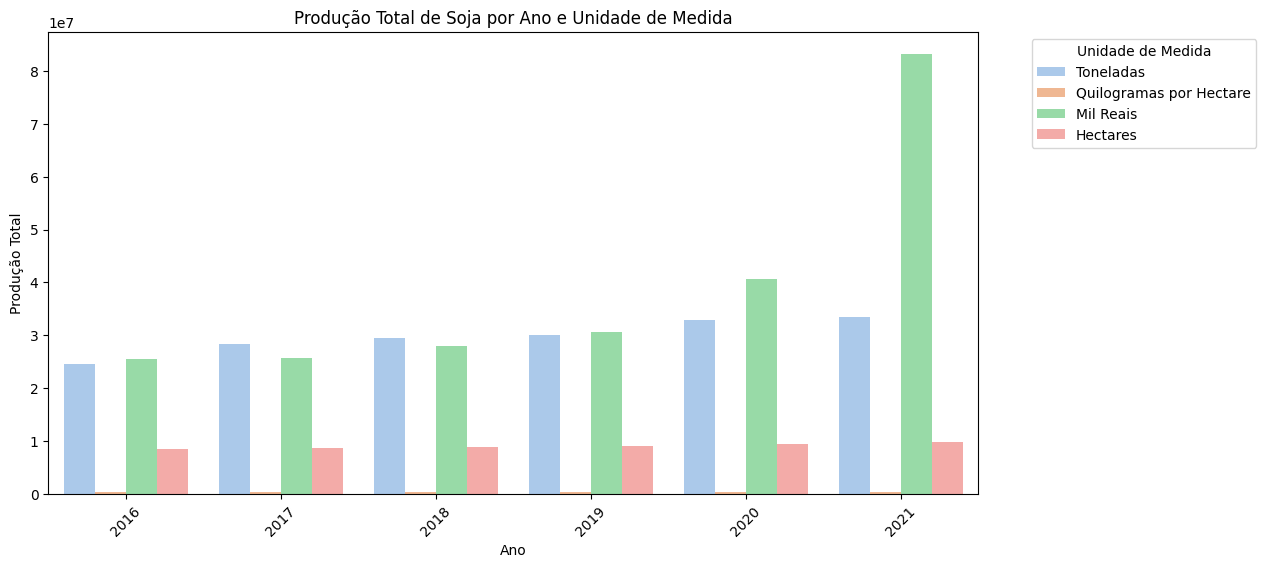

In [214]:
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")
sns.barplot(data=unidade_soja_ano, x='ano', y='producao_total', hue='unidade_medida')
plt.title('Produção Total de Soja por Ano e Unidade de Medida')
plt.xlabel('Ano')
plt.ylabel('Produção Total')
plt.legend(title='Unidade de Medida', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

O plantio de soja tem tomado um espaço cada vez maior no nosso agronegocio e o grafico traz um pouco desse dado. Inferindo que a coluna de valor tenha a unidade de medida "Mil Reais" como valores obtidos com a venda da soja, podemos ver um salto imenso em 2021 em relacao aos outros anos, tendencia levemente exibida já em 2020. Nesse link, uma análise do IBGE chama atenção para o fato: [PAM 2020: valor da produção agrícola nacional cresce 30,4% e chega a R$ 470,5 bilhões, recorde da série](https://agenciadenoticias.ibge.gov.br/agencia-sala-de-imprensa/2013-agencia-de-noticias/releases/31672-pam-2020-valor-da-producao-agricola-nacional-cresce-30-4-e-chega-a-r-470-5-bilhoes-recorde-da-serie#:~:text=Soja%20%E2%80%93%20A%20produ%C3%A7%C3%A3o%20de%20soja,mais%20do%20que%20em%202019.). Pode-se notar que grandes valores foram alcançados mantendo praticamente os mesmos níveis de produção. Claro, houve uma grande influencia da pandemia também, quando o Brasil se fortaleceu como grande produtor de alimentos mundial.

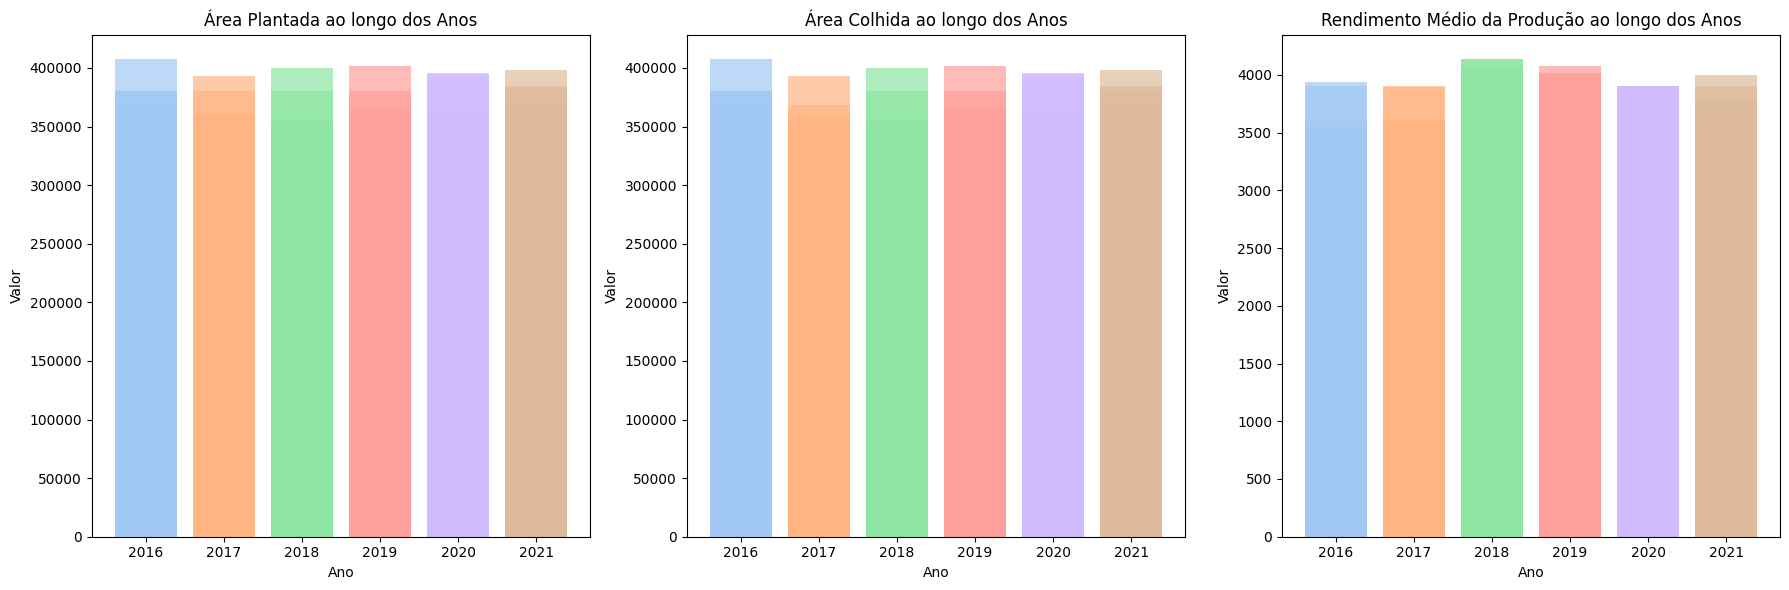

In [225]:
# Filtrar o DataFrame para obter apenas as variáveis desejadas
df_area_soja = sojadf[sojadf['variavel'].isin(['Área plantada', 'Área colhida'])]
df_rendimento = sojadf[sojadf['variavel'] == 'Rendimento médio da produção']

sns.set_palette(sns.color_palette("pastel"))
# Criar subplots separados para cada variável
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de barras para Área Plantada ao longo dos anos
for ano, grupo in df_area_soja[df_area_soja['variavel'] == 'Área plantada'].groupby('ano'):
    axs[0].bar(str(ano), grupo['valor'], alpha=0.7)

axs[0].set_title('Área Plantada ao longo dos Anos')
axs[0].set_ylabel('Valor')
axs[0].set_xlabel('Ano')

# Gráfico de barras para Área Colhida ao longo dos anos
for ano, grupo in df_area_soja[df_area_soja['variavel'] == 'Área colhida'].groupby('ano'):
    axs[1].bar(str(ano), grupo['valor'], alpha=0.7)

axs[1].set_title('Área Colhida ao longo dos Anos')
axs[1].set_ylabel('Valor')
axs[1].set_xlabel('Ano')

# Gráfico de barras para Rendimento Médio da Produção ao longo dos anos
for ano, grupo in df_rendimento.groupby('ano'):
    axs[2].bar(str(ano), grupo['valor'], alpha=0.7)

axs[2].set_title('Rendimento Médio da Produção ao longo dos Anos')
axs[2].set_ylabel('Valor')
axs[2].set_xlabel('Ano')

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

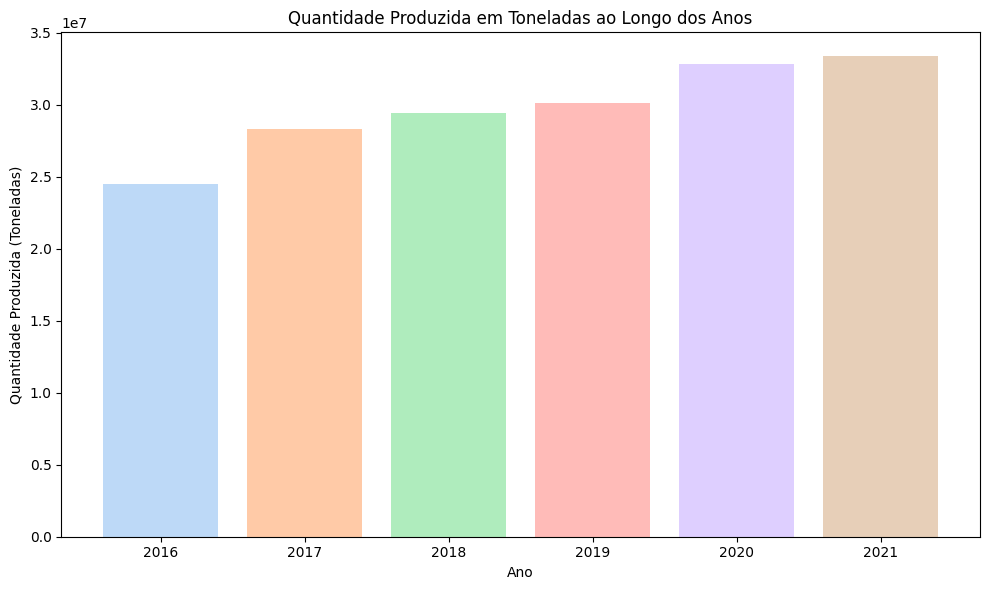

In [228]:
# Filtrar o DataFrame para obter apenas a variável desejada
df_quantidade_produzida_soja = sojadf[(sojadf['variavel'] == 'Quantidade produzida') & (sojadf['unidade_medida'] == 'Toneladas')]
sns.set_palette(sns.color_palette("pastel"))
# Criar um gráfico de barras para a quantidade produzida em toneladas ao longo dos anos
plt.figure(figsize=(10, 6))
for ano, grupo in df_quantidade_produzida_soja.groupby('ano'):
    plt.bar(str(ano), grupo['valor'].sum(), alpha=0.7)

plt.title('Quantidade Produzida em Toneladas ao Longo dos Anos')
plt.ylabel('Quantidade Produzida (Toneladas)')
plt.xlabel('Ano')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

<hr>

### Question 9

- Create a Rest API using python framework (e.g., django, fastapi, flask, tornado) in order to provide the data inside of crop_data.sql and ibge_municipios.json using as params: 
    - cod_variavel
    - cod_produto_lavouras_temporarias 
    - cod_ano
    - cod_municipio

- Try to provide a swagger to describe your API's structure.

- Try to host it in some cloud platform (e.g., heroku, pythonanywhere), and don't forget to provide the link to access it. Otherwise, prepare modules and run server/database in order to (1) run on some env: pip install requirements.txt; (2) them run server.py: python server.py.

- Share below a link to your Rest API code stored in a repository from GitHub.

In [13]:
from flask.ext.sqlalchemy import SQLAlchemy

ModuleNotFoundError: No module named 'flask.ext'

In [1]:
from flask_sqlalchemy import SQLAlchemy

db = SQLAlchemy()

class CropData(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    cod_variavel = db.Column(db.Integer)
    cod_produto_lavouras_temporarias = db.Column(db.Integer)
    cod_ano = db.Column(db.Integer)
    cod_municipio = db.Column(db.Integer)
    valor = db.Column(db.Float)


ModuleNotFoundError: No module named 'flask_sqlalchemy'

In [ ]:
SQLALCHEMY_DATABASE_URI = 'sqlite:///site.db'

In [2]:
from flask import Flask
from config import SQLALCHEMY_DATABASE_URI
from app.models import db

app = Flask(__name__)
app.config['SQLALCHEMY_DATABASE_URI'] = SQLALCHEMY_DATABASE_URI
db.init_app(app)

with app.app_context():
    db.create_all()

if __name__ == '__main__':
    app.run(debug=True)


ModuleNotFoundError: No module named 'config'

<hr>

In [ ]:
from flask import request, jsonify
from app.models import CropData, db
from app import app

@app.route('/api/data', methods=['GET'])
def get_data():
    cod_variavel = request.args.get('cod_variavel')
    cod_produto = request.args.get('cod_produto_lavouras_temporarias')
    cod_ano = request.args.get('cod_ano')
    cod_municipio = request.args.get('cod_municipio')

    query = CropData.query

    if cod_variavel:
        query = query.filter_by(cod_variavel=cod_variavel)

    if cod_produto:
        query = query.filter_by(cod_produto_lavouras_temporarias=cod_produto)

    if cod_ano:
        query = query.filter_by(cod_ano=cod_ano)

    if cod_municipio:
        query = query.filter_by(cod_municipio=cod_municipio)

    data = query.all()

    result = []
    for entry in data:
        result.append({
            'cod_variavel': entry.cod_variavel,
            'cod_produto_lavouras_temporarias': entry.cod_produto_lavouras_temporarias,
            'cod_ano': entry.cod_ano,
            'cod_municipio': entry.cod_municipio,
            'valor': entry.valor
        })

    return jsonify(result)

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
# Execute o servidor
python server.py

### Question 10

Make a python script in order to make many requests in parallel to your Rest API that you've created in the previous question.

<hr>